# __GA4 Measurement Protocol - For Offline Stores' Transactions__

## __Motivation:__

This Client is one of the largest hypermart in the Country. Understandably, the bulk of their revenue is generated from their offline brick and mortar hypermart stores. Therefore, GA4 Measurement Protocol's allows us to __understand the purchase journey of their customers _(traversing across online media and assets to offline stores)_ as well as attributing online activity to offline actions _(online to offline behavior).___

## __Agenda:__ 

_This example is done using a Web Data Stream. If you are sending data to an App Data Stream, some of your parameters will change._

0. Prerequisite: Ensure you have created your GA4 Property and Web Data Stream.
1. Obtain your: I. GA4 Property Measurement ID, II. API Secret. Personally, I stored these values in a separate JSON file to be imported.
2. Create a class to represent the Client's customer and their transaction's parameters and user properties.
> - Sample code to fetch data from the Client's POS system - related to the current transaction and the offline customer _(might involve backend)_.
> - Sample code to instantiate the offline customer's current transaction and information. This is then used to construct the Payload below _(does not involve backend)_.
3. Construct the Payload
4. Send it to GA4
5. Check it on GA4

By: __Lee Xuan Rui (Ray), https://sg.linkedin.com/in/xuan-rui-ray-lee-bbb625a5__.

Official Documentation: https://developers.google.com/analytics/devguides/collection/protocol/ga4/sending-events.

GA4 Event Builder: https://ga-dev-tools.web.app/ga4/.

My GitHub: https://github.com/ray-xuanruilee.

## __1. Obtain your: I. GA4 Property Measurement ID, II. API Secret__

- GA4 Web Data Stream Measurement ID

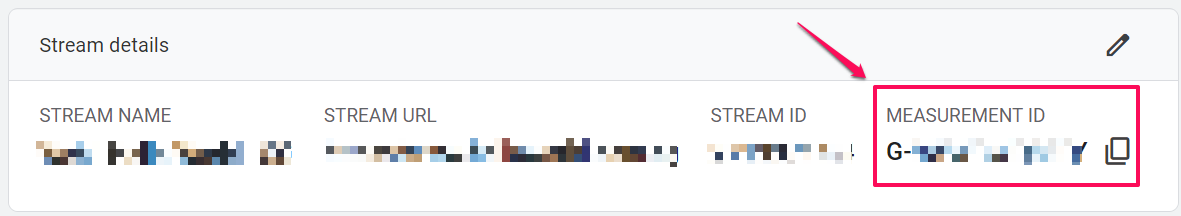

- GA4 MP API Secret: Please keep this secret, this should __not__ be publicly shared.

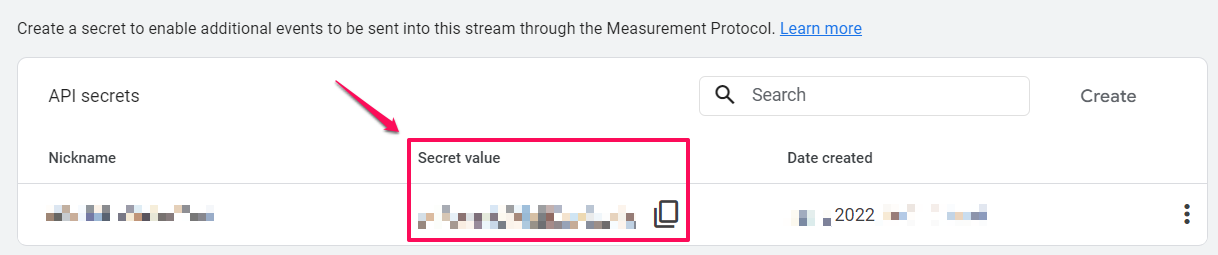

- To keep these information confidential, I have stored them in a separate JSON file.

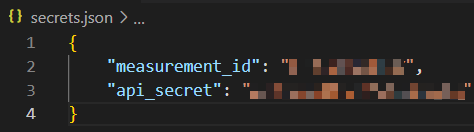

In [1]:
# Import the libraries to read the stored secrets

import os
import json

def read_secrets() -> dict:
    filename = os.path.join("ga4_mp_secrets.json")
    try:
        with open(filename, mode='r') as f:
            return json.loads(f.read())
    except Exception as e:
        print(f'Error Message: {e}.')
        return {}
    
ga4_mp_secrets = read_secrets()

## __2. Create a Class to Represent Big C's Customer and Their Transaction's Parameters and User Properties.__

To get a website user's Client ID _(their Google Analytics Cookie ID)_, you can see the method here: https://developers.google.com/tag-platform/gtagjs/reference#get_mp_example.

In [2]:
# Might involve the backend by building logic to access the POS system data here
# Class to represent current transaction data fetched from the Point-of-Sales (POS) system

class POSCurrentTransaction:
    def __init__(self, store_id, client_id, user_id, membership_tier, affiliation, coupon, transaction_id, shipping, tax, value, items):
        self.store_id = store_id
        self.client_id = client_id
        self.user_id = user_id
        self.membership_tier = membership_tier
        self.affiliation = affiliation
        self.coupon = coupon
        self.transaction_id = transaction_id
        self.shipping = shipping
        self.tax = tax
        self.value = value
        self.items = items

In [3]:
# Get current offline customer and transaction data from the POS system or backend

current_transaction = POSCurrentTransaction('store_001',
                                            'ga_68656c6c6f20776f726c64',
                                            'user_75736572206e6f2e2031',
                                            'gold',
                                            'store_001',
                                            'bfcm_promo_1',
                                            '001_88888801',
                                            0,
                                            10,
                                            1000,
                                            items = 
                                            {
                                                "item_id":"item_008",
                                                "item_name":"fancy feast",
                                                "quantity":1,
                                                "affiliation":"store_001",
                                                "coupon":"bfcm_promo_1",
                                                "discount":100,
                                                "item_brand":"best food",
                                                "item_category":"pets",
                                                "item_variant":"tuna",
                                                "tax":10,
                                                "price":1100,
                                                "currency":"THB"
                                            }
                                           )

In [4]:
# Does not involve the backend, since we simply want to gather the offline customer and current transaction here
# Separate Class to represent the offline customer's transaction's information as well as their user properties

class CustomerOfflineTransaction:
    # Class attribute
    store_type = "offline"
    currency = "THB"
    
    def __init__(self, curr_trx):
        self.store_id = curr_trx.store_id
        self.client_id = curr_trx.client_id
        self.user_id = curr_trx.user_id
        self.membership_tier = curr_trx.membership_tier
        self.affiliation = curr_trx.affiliation
        self.coupon = curr_trx.coupon
        self.transaction_id = curr_trx.transaction_id
        self.shipping = curr_trx.shipping
        self.tax = curr_trx.tax
        self.value = curr_trx.value
        self.items = curr_trx.items

In [5]:
# Instantiate the offline customer's current POS transaction

offline_user_trx = CustomerOfflineTransaction(current_transaction)

## __3. Construct the Payload__

In [6]:
# Import the other libraries

import requests

In [7]:
measurement_id = ga4_mp_secrets['measurement_id']
api_secret = ga4_mp_secrets['api_secret']

In [8]:
url = f"https://www.google-analytics.com/mp/collect?measurement_id={measurement_id}&api_secret={api_secret}"

Note: When constructing the payload, the __"transaction_id" MUST be unique,__ otherwise even though the status code shows "204", the event will __not__ show up in GA4's Real-time report.

In [9]:
payload = {
    "client_id": offline_user_trx.client_id,
    "user_id": offline_user_trx.user_id,
    "non_personalized_ads": False,
    "events": [
        {
            "name": "purchase",
            "params": {
                "items":[offline_user_trx.items],
                "store_id": offline_user_trx.store_id,
                "store_type": offline_user_trx.store_type,
                "affiliation": offline_user_trx.affiliation,
                "coupon": offline_user_trx.coupon,
                "currency": offline_user_trx.currency,
                "transaction_id": offline_user_trx.transaction_id,
                "shipping": offline_user_trx.shipping,
                "tax": offline_user_trx.tax,
                "value": offline_user_trx.value
            }
        }
    ]
}

## __4. Send it to GA4__

In [10]:
r = requests.post(url,data=json.dumps(payload),verify=True)
print(r.status_code)

204


## __5. Check it on GA4__

- We can now see the GA4 MP "purchase" event with the same "transaction_id" showing up in GA4's Real-time report.

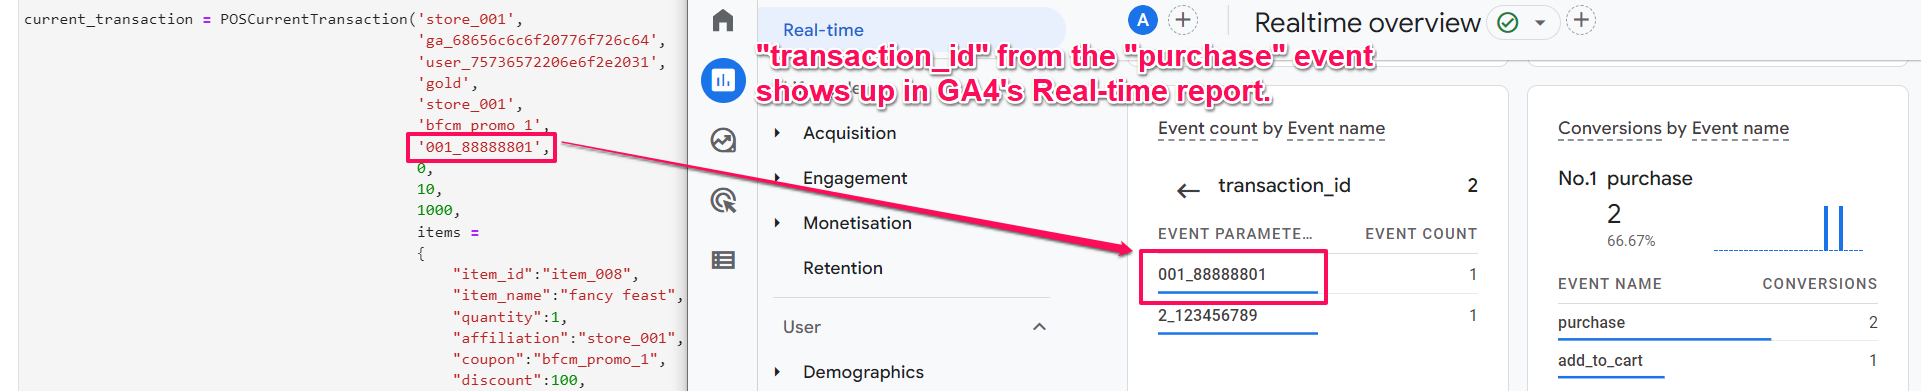

### The End.
### Thank You!